> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb_Movies ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
1- Which genres are most popular from year to year?
2 - What kinds of properties are associated with movies that have high revenues?
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

### References 


In [1]:
#Book(Python for Data Analysis Data Wrangling with Pandas, NumPy,and IPython)
#githup(github.com/deepak525/Investigate_TMDb_Movies)


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


### When I use a pandas==0.25.0 I faced a lot of problems

In [3]:

# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
!pip install --upgrade pandas==1.3.5

In [4]:
#Check The pandas Version
pd.__version__

'1.3.5'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Read The Data From CSV File
df = pd.read_csv('tmdb-movies.csv')
# Check First 2 Row
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
#Check Columns Names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
#Check The Shape
df.shape

(10866, 21)

In [8]:
# An Overview of Data Statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#Check The Summary of Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
# Convert 'release_date' type from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Check First 2 Row of 'release_date'
df['release_date'].head(2)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Delete unimportant columns
df.drop(["id","imdb_id","homepage","tagline","keywords","overview","budget_adj","revenue_adj"], inplace=True, axis=1)



In [12]:
#Check Columns Names After Deletion

df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [13]:
#Check The Shape After Deletion

df.shape

(10866, 13)

In [14]:
# Check for Duplicates in The Data
df.duplicated().sum()

1

In [15]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [16]:
# Check for Duplicates in The Data After Deletion

df.duplicated().sum()

0

In [17]:
#Count Total Rows in Each Column Which Contain Null Values

df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [18]:
#Delete All the null values

df.dropna(inplace = True)

In [19]:
#Delete All the 0 values in (budget , runtime)
df.drop(df[(df.budget == 0)|(df.runtime == 0)].index,inplace=True)

# Check First 2 Row
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [20]:
#df.hist(figsize = (15,20))

In [21]:
# Check The Unique Value in 'release_year'
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Which genres are most popular from year to year?

In [22]:
#Get All Unique Data of 'genre'
 
def get_all_genre(x):
    data = df[x].str.cat(sep = '|')
    data1 = pd.Series(data.split('|')).unique()

    return data1

genre = get_all_genre('genres')

In [23]:
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

#Map All Rows of 'genre' 
genre_details = list(map(str,(df['genres'])))


#Make a Null Dataframe (indexs = genres , columns = years).
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))


#Make All Values of dataframe from NaN to 0
popularity_df = popularity_df.fillna(value = 0)

count = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[count]] = popularity_df.loc[split_genre, year[count]] + popularity[count]
    count+=1
    



In [24]:
popularity_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,3.009075,1.193371,3.929515,3.496516,3.153791,3.411147,1.053740,4.015400,1.356276,3.819392,...,46.951803,54.320593,75.995575,77.543867,87.229050,101.619596,99.509247,106.206031,189.260208,209.770354
Adventure,2.584521,3.386535,4.865526,4.382845,3.348732,2.652540,1.275695,6.807387,5.355381,3.292319,...,43.569487,40.666685,56.900317,68.984501,72.568425,62.094516,66.405746,77.038729,149.186793,204.484093
Science Fiction,0.839608,0.000000,0.215748,0.334587,0.178025,0.000000,0.617623,0.109398,4.507375,0.000000,...,18.893715,17.953268,32.603035,60.016287,31.350045,47.393911,41.954418,63.783294,129.216649,172.106177
Thriller,3.645931,0.000000,4.075947,4.427242,3.817237,2.531067,0.760891,2.569521,1.483146,2.346708,...,60.321135,71.715560,68.114044,78.857344,79.136340,95.074389,83.264471,90.426322,134.177997,195.743887
Fantasy,0.712389,0.000000,0.235542,0.178713,1.987819,0.000000,0.000000,0.241283,0.323826,0.000000,...,28.261906,38.145188,30.137444,38.776637,38.992682,39.059031,39.229878,33.921514,55.521591,45.202629
Crime,0.000000,0.900245,0.810805,0.781120,0.663446,0.289649,0.410366,2.992940,1.483146,2.844060,...,27.110716,34.264798,39.566281,19.597707,28.554833,36.792390,39.833022,54.311736,42.704086,75.821728
Western,1.872132,0.173731,1.033186,0.000000,0.000000,0.119918,0.660593,0.000000,0.621202,1.973206,...,0.463068,2.199658,0.731827,0.000000,3.374361,3.139365,6.200466,1.602102,0.870104,17.743075
Drama,4.694612,5.101854,4.773092,1.676020,4.063691,3.137302,1.503477,5.969983,4.024866,4.559501,...,82.312543,76.631806,85.344248,90.820779,90.940927,93.369941,97.017288,109.445031,174.352292,177.069512
Family,0.000000,2.935770,0.000000,0.178713,2.621701,1.313676,1.778974,2.791987,0.956955,0.000000,...,34.124430,30.047014,29.784759,37.091589,41.232675,33.430510,20.858000,30.959931,34.576327,44.104444
Animation,0.000000,2.631987,0.000000,0.000000,0.000000,0.000000,1.227582,2.550704,0.000000,0.000000,...,19.548321,15.486819,19.607874,26.803437,20.829130,21.069086,21.897169,28.219787,27.758304,29.562995


In [25]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.247818,-0.059159,1.619542,1.611243,0.923736,1.932770,0.718518,0.969954,-0.108516,1.838953,...,0.898397,1.184655,1.793931,1.455159,1.763836,1.958564,2.028184,1.907177,2.112950,1.853069
Adventure,0.950878,1.291296,2.189000,2.239359,1.040355,1.303163,1.085712,2.247724,2.233742,1.476243,...,0.754562,0.590364,1.067352,1.168177,1.281344,0.785889,1.003662,1.093690,1.460287,1.782295
Science Fiction,-0.269544,-0.793985,-0.639870,-0.629527,-0.856438,-0.898314,-0.002976,-0.817653,1.737069,-0.789398,...,-0.294793,-0.398245,0.142833,0.867486,-0.075182,0.349734,0.246916,0.723991,1.135040,1.348813
Thriller,1.693245,-0.793985,1.708630,2.270822,1.320626,1.202347,0.234041,0.308238,-0.034208,0.825512,...,1.466937,1.941777,1.494037,1.499198,1.497499,1.764373,1.525423,1.467075,1.215844,1.665280
Fantasy,-0.358523,-0.793985,-0.627828,-0.739990,0.226224,-0.898314,-1.024747,-0.757295,-0.713217,-0.789398,...,0.103596,0.480615,0.049017,0.155353,0.176343,0.102446,0.162594,-0.108865,-0.065207,-0.350201


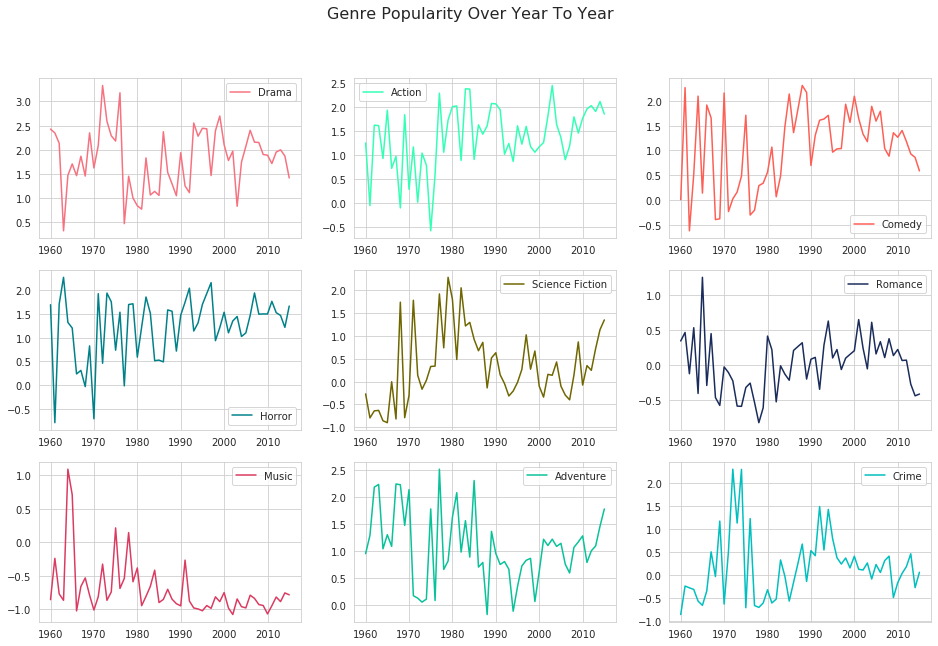

In [30]:
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)

#plot the 'Action' genre plot see the popularity difference over year to year.
popular_genre.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)

#plot the 'Comedy' genre plot see the popularity difference over year to year.
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

sns.set_style("whitegrid")


### What kinds of properties are associated with movies that have high revenues?

In [27]:
# Convert 'revenue' To DataFrame and Sorted
revenue = pd.DataFrame(df['revenue'].sort_values(ascending=False))

data_set = ['popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']

for i in data_set:
    revenue[i] = df[i]



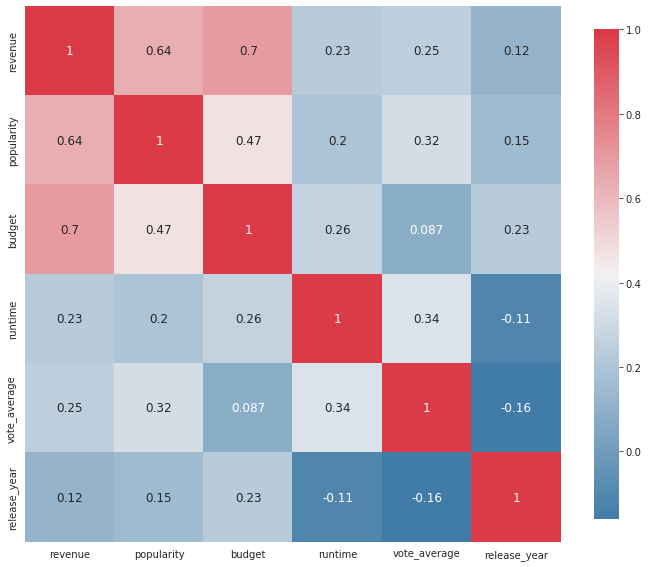

In [28]:
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
_ = sns.heatmap(revenue.corr(),cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

# <a id='conclusions'></a>
## Conclusions

* Drama is the most popular genre, following by action, comedy and thriller.
* Revenue is directly connected to the budget.


> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1